<a href="https://colab.research.google.com/github/nikita-bhalodiya/Classification-Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - $\color{red}{\text{
Health Insurance Cross Sell Prediction}}$



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member**-  $\color{green}{\text{Nikita Bhalodiya}}$


# **Project Summary -**

**1) Loading Data** : 

1. Importing libraries
2. Dataset Loading
3. Dataset Information

**2) Data Wrangling and Exploratory data analysis(EDA) :** 

1. Univariate Analysis:

    1. Distribution of Dependent variable Response
    2. Distribution of Age
    3. Distribution of Previously_Insured
    4. Distribution of  Annual_Preminum
    5. Distribution of Vehicle_Damage
    6. Distribution of Vehicle_Age

2. Bivariate analysis:
    1. Visualisation of Age VS Response
    2. Visualisation of Gender Vs Response
    3. Visualisation of Vehicle Age and Customer Respons
    4.  Visualisation of Annual_Premium Vs Response

**3) Cleaning Data** : 

1. Handling Null Values
2. Handling Duplicate Values
3. Remove Outlier

**4) Feature Engineering** 

**5) Pre processing of the data** 

**6) Model implementation** 


# **GitHub Link -**

https://github.com/nikita-bhalodiya/Regression-Bike_Sharing_Demand_Prediction.git

# **Problem Statement**


**Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.**

**An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.**

**For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.**

**Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.**

**Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.**

**Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.** 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load 
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/ML- Classification/ Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

In [6]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**We can see there is no duplicate values.**

### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**We can see there is no null values.**

### What did you know about your dataset?

The dataset contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.





## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description 

There are total 381109  data and 12 columns. Lets try to understand about the columns we've got here.

1. **id** : Unique ID for the customer
2. **Gender** : Gender of the customer
3. **Age** : Age of the customer
4. **Driving_License** 0 : Customer does not have DL, 1 : Customer already has DL
5. **Region_Code** : Unique code for the region of the customer
6. **Previously_Insured** : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. **Vehicle_Age** : Age of the Vehicle
8. **Vehicle_Damage** :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
9. **Annual_Premium** : The amount customer needs to pay as premium in the year
10. **PolicySalesChannel** : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. **Vintage** : Number of Days, Customer has been associated with the company
12. **Response** : 1 : Customer is interested, 0 : Customer is not interested
    **(Dependent Variable)**



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df[col].unique())

In [14]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Previously_Insured','Vehicle_Damage','Vehicle_Age']
cat_unique_vals(categorical_columns,df)

The values that the categorical column Previously_Insured can take are: [0 1]
The values that the categorical column Vehicle_Damage can take are: ['Yes' 'No']
The values that the categorical column Vehicle_Age can take are: ['> 2 Years' '1-2 Year' '< 1 Year']


## 3. ***Data Wrangling***

### Data Wrangling Code

We'll perform further checks for the values (total values)  that categorical columns can take.

In [15]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return df.groupby(col)['Response'].sum().reset_index()

In [16]:
#Previously_Insured column
Previously_Insured_col = create_df_analysis('Previously_Insured')
Previously_Insured_col

,Previously_Insured,Response
0,0,46552
1,1,158


In [17]:
#Vehicle_Damage  column
Vehicle_Damage_col = create_df_analysis('Vehicle_Damage')
Vehicle_Damage_col

,Vehicle_Damage,Response
0,No,982
1,Yes,45728


In [18]:
#Vehicle_Age column
Vehicle_Age_col = create_df_analysis('Vehicle_Age')
Vehicle_Age_col

,Vehicle_Age,Response
0,1-2 Year,34806
1,< 1 Year,7202
2,> 2 Years,4702


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

#### Chart - 1 Distribution of Dependent variable Response using Bar Plot

<Axes: xlabel='Response', ylabel='count'>

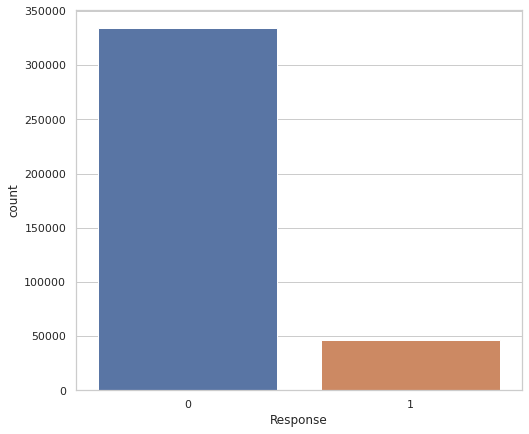

In [19]:
# Creating the bar plot visualisation for Dependent variable 'Response'
plt.figure(figsize=(8,7))
sns.set_theme(style='whitegrid')
sns.countplot(x=df['Response'],data=df)
     

##### 1. Why did you pick the specific chart?

Using bar plot  we can visualized in positive and negative response easily.

##### 2. What is/are the insight(s) found from the chart?

From above fig we can see that the data is highly imbalanced.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this will help for creating positive business impact.

#### Chart - 2 Distribution of Age using Bar Plot

<Axes: xlabel='Age', ylabel='count'>

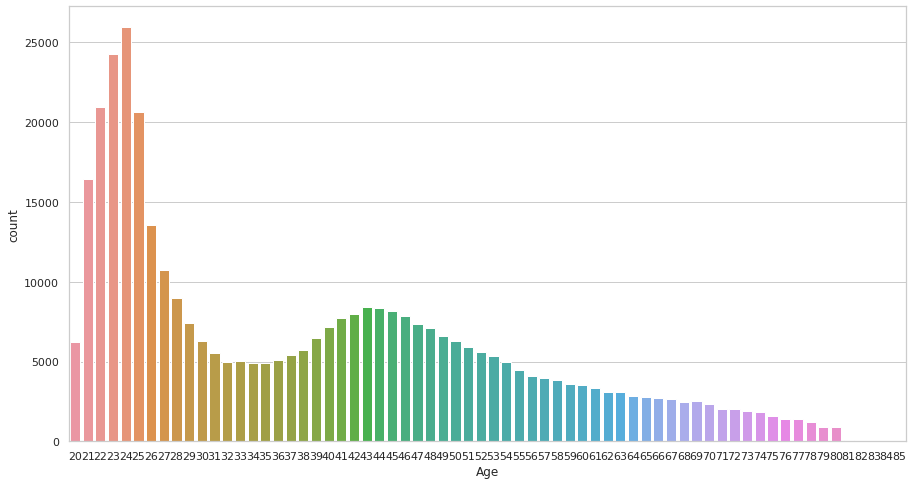

In [20]:
# Creating the bar plot visualisation for Age column
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'],data=df)

##### 1. Why did you pick the specific chart?

Easly understand the Age of Customer.

##### 2. What is/are the insight(s) found from the chart?

From the above distribution of age we can see that most of the customers age is between 21 to 25 years.There are few Customers above the age of 60 years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help for decision as most of the customers age is between 21 to 25 yeas.

#### Chart - 3 Distribution of Previously_Insured using Pie chart

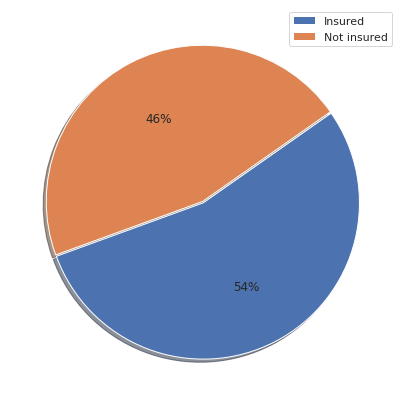

In [21]:
#Creating the pie chart visualisation for Previously_Insured column
plt.figure(figsize=(7,9))
plt.pie(df['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()

     

##### 1. Why did you pick the specific chart?

Pie chart help to visulaized that how many customers are previously insured.

##### 2. What is/are the insight(s) found from the chart?

54% customer are previously insured ahe 46% customer are are not insured yet.

Customer who are not perviosly insured are likely to be inetrested.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help to creating a positive business impact.

#### Chart - 4 Distribution of Annual_Preminum using Line Plot

<Axes: xlabel='Annual_Premium', ylabel='Density'>

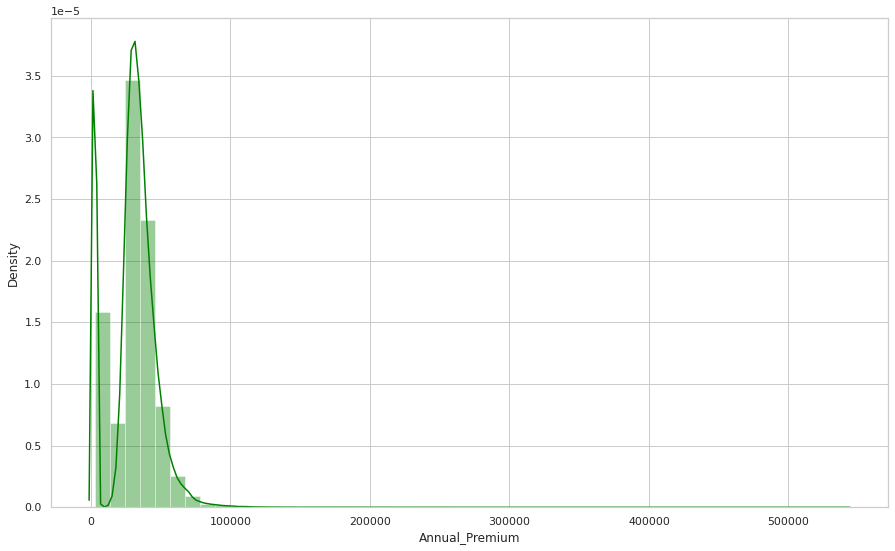

In [22]:
#Creating the Line Plot visualisation for Annual_Premium column
plt.figure(figsize=(15,9))
sns.distplot(df['Annual_Premium'], color='green')

##### 1. Why did you pick the specific chart?

With Line Plot we can Visulazed whether data is right or left skew.

##### 2. What is/are the insight(s) found from the chart?

From the distribution plot we can infer that the annual premimum variable is right skewed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help to creating a positive business impact.

#### Chart - 5 Distribution of Vehicle_Damage using box plot

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

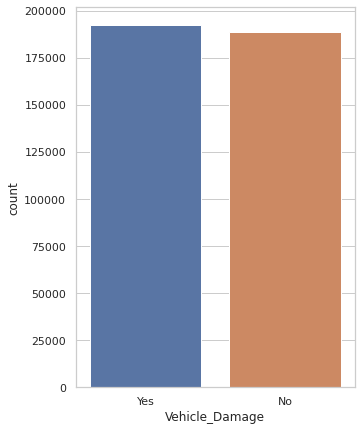

In [23]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Vehicle_Damage'])

Customers with Vehicle_Damage are likely to buy insurance

#### Chart - 6 Distribution of Vehicle_Age using box plot

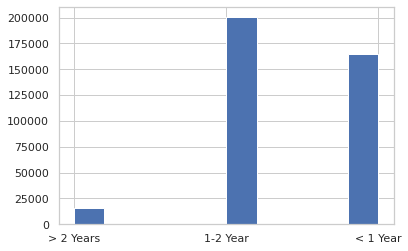

In [24]:
df['Vehicle_Age'].hist();

From the above plot we can see that most of the people are having vehicle age between 1 or 2 years and very few people are having vehicle age more than 2 years.

## **Bivariate Analysis**

#### Chart - 7 Visualisation of Age VS Response

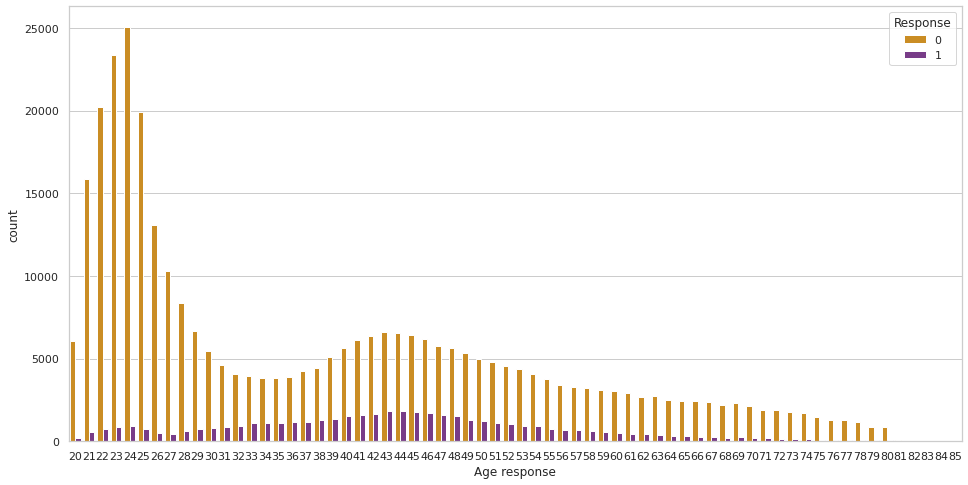

In [25]:
#Age VS Response
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age',hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()
     

People ages between from 31 to 50 are more likely to respond.

Young people below 30 are not interested in vehicle insurance.

#### Chart - 8 Visualisation of Gender Vs Response

<Axes: xlabel='Gender'>

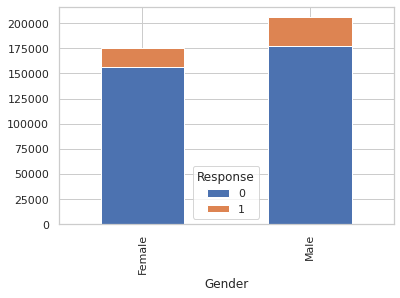

In [26]:
#Gender vs Response
df.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

##### 1. Why did you pick the specific chart?

We can see positive and negative response with respect to gender.

##### 2. What is/are the insight(s) found from the chart?

Male category is slightly greater than that of female and chances of buying the insurance is also little high

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It will help creating a positive business impact.

#### Chart - 9 - Visualisation of Vehicle Age and Customer Respons

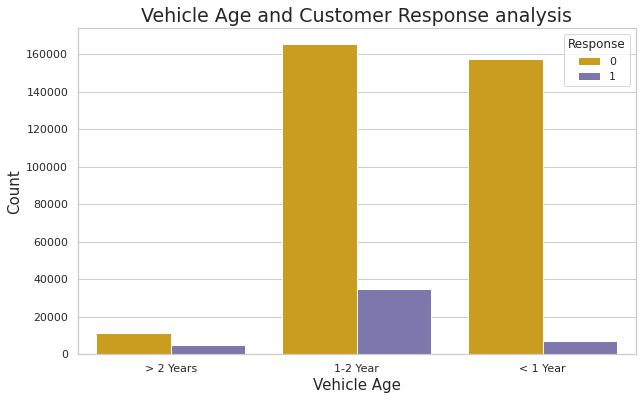

In [27]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Vehicle_Age', hue = 'Response', palette='Dark2_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

##### 1. Why did you pick the specific chart?

We can visulaize using box plot about in which vehical range most of insurance is taken.

##### 2. What is/are the insight(s) found from the chart?

Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

Customers with with Vehicle_Age < 1 years have very less chance of buying Insurance

#### Chart - 10 - Visualisation of Annual_Premium Vs Response

<Axes: xlabel='Response', ylabel='Annual_Premium'>

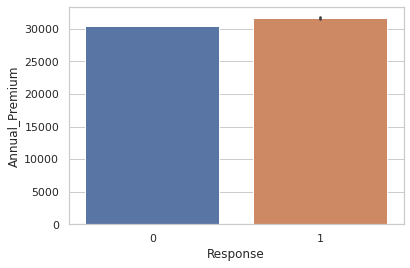

In [28]:

sns.barplot(x = 'Response', y ='Annual_Premium', data = df)

People who response have slightly higher annual premium

#### Chart - 11- Correlation Heatmap

<Axes: >

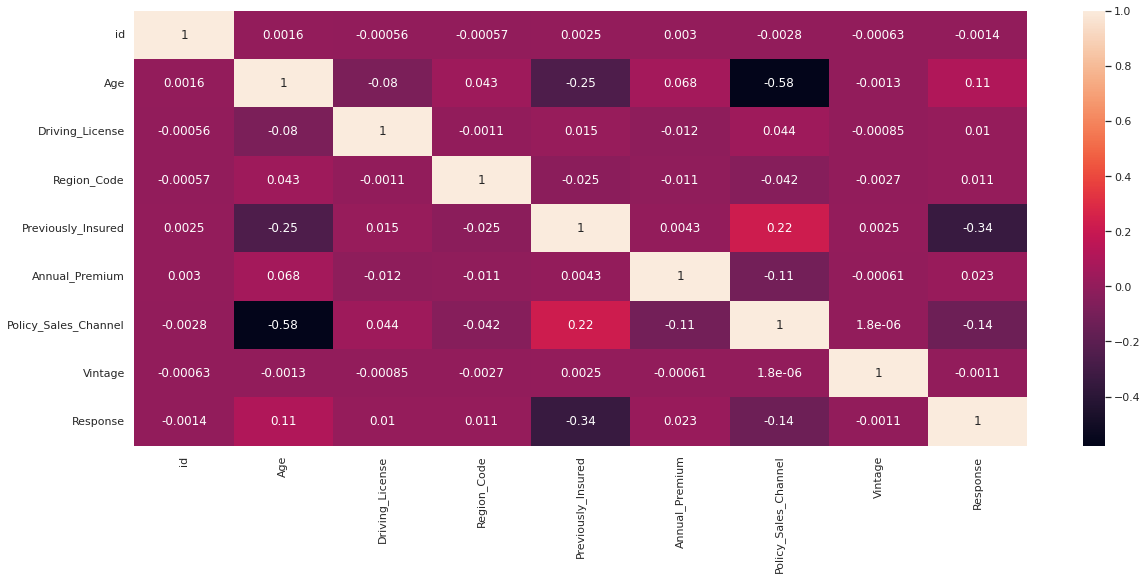

In [29]:
#Plotting correlation matrix using sns.heatmap
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

##### 1. Why did you pick the specific chart?

Correlation plot display relation between all features like how closly they related to each other.

##### 2. What is/are the insight(s) found from the chart?

Target variable is not much affected by Vintage variable. we can drop least correlated variable.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model.

Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [30]:
#Checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**As we can see there are no null values present in our dataset and therefore we are good to go.**

### 2. Handling Outliers

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [31]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(df.describe().columns)-{'Response','Previously_Insured','Driving_License'})
possible_outlier_cols

['Region_Code',
 'Policy_Sales_Channel',
 'Age',
 'Annual_Premium',
 'id',
 'Vintage']

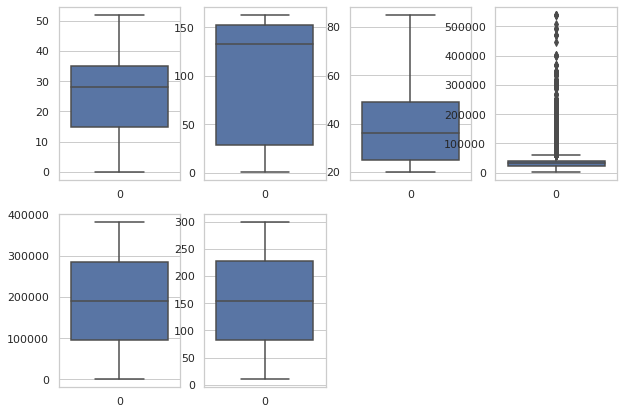

In [32]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_cols):
  plt.subplot(2,4,index+1)
  sns.boxplot(df[item])

**Here we can observe lot of outliers in the variable Annual_Premium**

##### What all outlier treatment techniques have you used and why did you use those techniques?

In [33]:
#Finding the inter-quartile range for the columns with outliers
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3-Q1
IQR

14995.0

In [34]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [35]:
#Detecting and removing the outliers
df['Annual_Premium'] = df['Annual_Premium'][~((df['Annual_Premium'] < l_fence) | (df['Annual_Premium'] > u_fence))]


In [36]:
#Checking the number of outliers deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Due to outlier deletion, some null values have been created in  Annual_Primium columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.**

Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.

In [37]:
#impute the null values created by outlier handling.
df['Annual_Premium'].fillna(df['Annual_Premium'].median(),inplace=True)

In [38]:
#Checking if the imputation is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**The imputation is successful and therefore we have handled the outliers successfully**

### 3. Categorical Encoding

In [39]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df['Vehicle_Age']= df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No':0})

In [40]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Feature Encoding:**

Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as **Feature Encoding**

Here we have three columns that require encoding and they are Gender, Vehicle_Age and Vehicle_Damage.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

**Checking correlation for feature removal**:

In [41]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.018585
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

<Axes: >

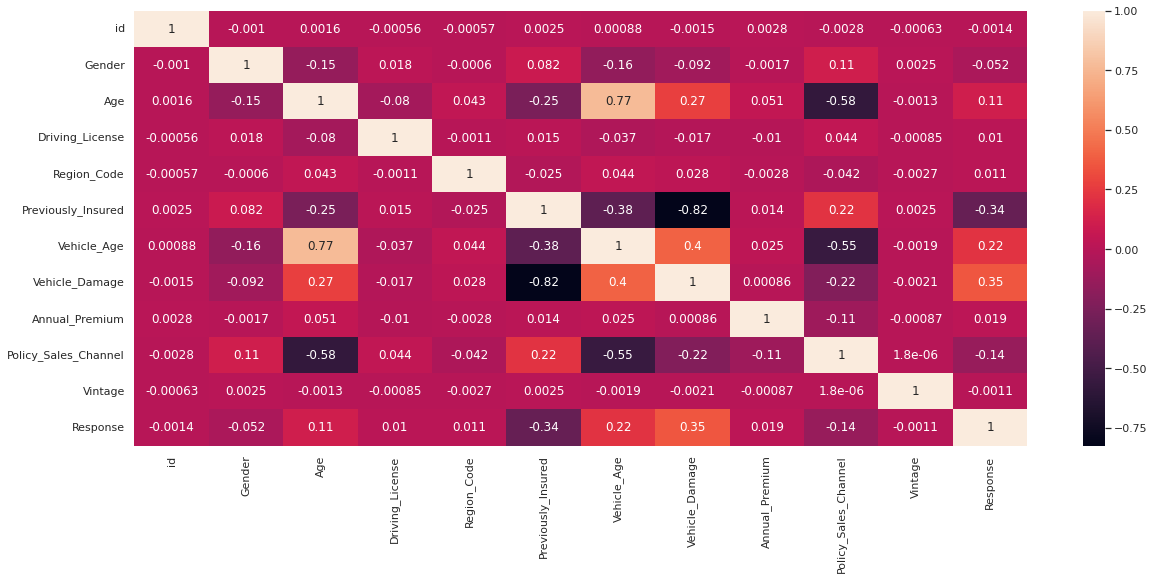

In [42]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

Target variable is not much affected by Vintage variable. we can drop least correlated variable. Same we can drop Driving_License,Policy_Sales_Channel.

In [43]:
#Dropping unnecessary columns
df.drop(columns={'id','Driving_License','Policy_Sales_Channel','Vintage'},axis=1,inplace=True)

In [44]:
df.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Response'],
      dtype='object')

#### 2. Feature Selection

In [45]:
x=df.drop(['Response','Gender'],axis=1) #contain all  independent variable
y=df['Response']   

#### 3. Handling Imbalanced Dataset

In [46]:
# check for imbalance in data 
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

We can clearly see that there is a huge difference between the data set.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. So solving this issue we use resampling technique.

In [47]:
#Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(x, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


#### 4. Data Splitting

In [48]:
#Splitting the dataset into test and train datasets
X_train, X_test ,y_train, y_test=  train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((468158, 6), (200640, 6), (468158,), (200640,))

#### 5. Data Scaling

In [49]:
 #Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
     

## ***6. ML Model Implementation***


In this project Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

Dataset has more than 300k records.Cannot go with SVM Classifier as it takes more time to train as dataset increase

So we start of follwing models: 

 1.Logistic Regression

 2.Random Forest

 3.XGBClassifier

### ML Model - 1 Logistic Regression

In [50]:
#Importing Logistic Regression
model= LogisticRegression(random_state=42)
model=model.fit(X_train, y_train)
#Making prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [51]:
# Evaluation
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)


recall_score :  0.9762397516516755
precision_score : 0.707218798428659
f1_score : 0.820234159146293
accuracy_score : 0.7856509170653907
ROC_AUC Score: 0.8343217810897837


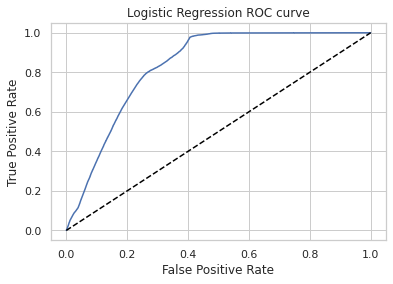

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, prob)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()
     

[[59517 40619]
 [ 2388 98116]]


<Axes: >

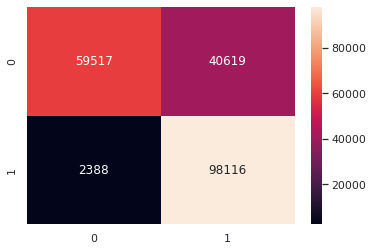

In [53]:
#confusion_matrix
matrix= confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

From the confusion matrix we see that the model is predicting positive responses but also predicting negative response too.

In [54]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61905
           1       0.98      0.71      0.82    138735

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



### ML Model - 2 RandomForest Classifier

In [55]:
RF_model= RandomForestClassifier()
RF_model= RF_model.fit(X_train, y_train)
#Making prediction
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)


recall_score :  0.9824683594682798
precision_score : 0.856525736888673
f1_score : 0.9151844883356659
accuracy_score : 0.9087818979266348
ROC_AUC Score: 0.9179416331764061


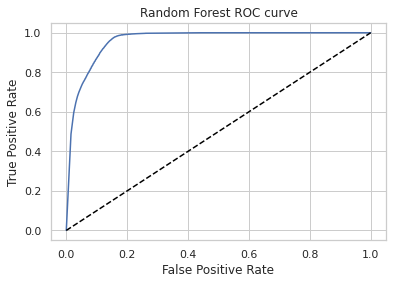

In [57]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()
     
     

[[83596 16540]
 [ 1762 98742]]


<Axes: >

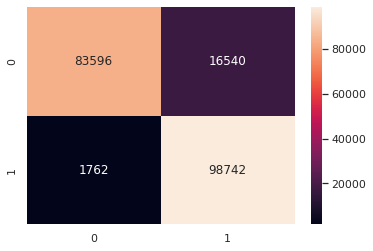

In [58]:
#confusion_matrix
matrix= confusion_matrix(y_test,rf_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

The confusion matrix now shows that the model now is much better with predicting positive responses.

In [59]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     85358
           1       0.98      0.86      0.92    115282

    accuracy                           0.91    200640
   macro avg       0.91      0.92      0.91    200640
weighted avg       0.92      0.91      0.91    200640



### ML Model - 3 XGBoost

In [60]:
XG_model= XGBClassifier()
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Evaluation
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)

recall_score :  0.9334951842712728
precision_score : 0.7441012015703692
f1_score : 0.8281072779349394
accuracy_score : 0.8058761961722488
ROC_AUC Score: 0.827224633378572


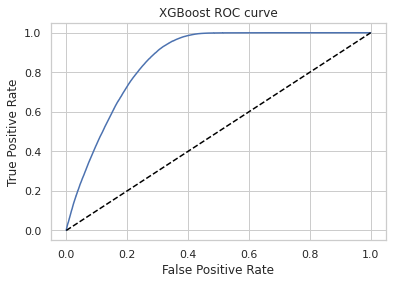

In [62]:
fpr, tpr, _ = roc_curve(y_test, XG_prob)

plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()
     
     

[[67871 32265]
 [ 6684 93820]]


<Axes: >

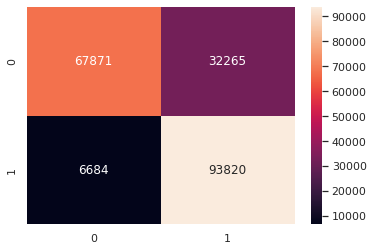

In [63]:
#confusion_matrix

matrix= confusion_matrix(y_test,XG_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

From the confusion matrix we see that the model is a bit better with predicting positive responses.

In [64]:
print(classification_report(XG_pred, y_test))
     

              precision    recall  f1-score   support

           0       0.68      0.91      0.78     74555
           1       0.93      0.74      0.83    126085

    accuracy                           0.81    200640
   macro avg       0.81      0.83      0.80    200640
weighted avg       0.84      0.81      0.81    200640



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I had calculated all evaluation metrics like Recall score, Precision score, F1 score,Accuracy score and ROC Accuracy score and see confusion matrix.

From the confusion matrix we can predict positive response.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [65]:
com= ['Logistic Regression','Randomforest','XGBClassifier']
data={'Accuracy':[A_lgt,A_rf,A_XG],'Recall':[r_lgt,r_rf, r_XG],'Precision':[p_lgt, p_rf, p_XG], 'f1_score':[f1_lgt, f1_rf, f1_XG],'ROC_AUC':[acu_lgt, acu_rf, acu_XG]}
result=pd.DataFrame(data=data, index=com)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.785651,0.976240,0.707219,0.820234,0.834322
Randomforest,0.908782,0.982468,0.856526,0.915184,0.917942
XGBClassifier,0.805876,0.933495,0.744101,0.828107,0.827225


For the logistic regression we got an accuracy of 78% and for the XGBClassifier we got the aacuracy of 80%. We are getting the highest accuracy of about 91% and ROC_AUC score of 92% with random forest.
So, From this I can say that random forest is the best models as compare to the other models.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Data Exploration Conclusions:**

1. Customers belonging to youngAge are more interested in vehicle response.while  Young people below 30 are not interested in vehicle insurance.
2. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having damaged vehicles are more likely to be interested in vehicle insurance.
3. The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.
4. Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two.


**Modeling Conclusions:**

1. I applied Machine Learning Algorithms to determine whether a customer would be interested in Vehicle Insurance.

2. For the logistic regression we got an accuracy of 78% and for the XGBClassifier we got the aacuracy of 79%.
We are getting the highest accuracy of about 91% and ROC_AUC score of 92% with random forest.

3. So, From this we can conclude that random forest is the best models as compare to the other models.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***